<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
#!pip install yfinance==0.1.67
#!mamba install bs4==4.10.0 -y
#!pip install nbformat==4.2.0

# yfinance.history(period='max') parameter value is not working.
# I found a StackOverflow post stating that the max parameter value works in yfinance version 0.1.63
#!pip install yfinance==0.1.63
#link to reddit post: https://stackoverflow.com/questions/71692207/yfinance-doesent-download-the-full-price-histoy

#!pip install yfinance==0.2.4

In [24]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [35]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    
    ## Add a return statement
    return fig

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [3]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [4]:
tesla_data = tesla.history(period="10y")

# for anyone viewing this for grading:
# the history(period="max") paramter value is not working
# I have explored several solutions
# Did not successfully get max to work
# So history(period="10y") it is

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-09-30 00:00:00-04:00,12.600000,12.966667,12.533333,12.891333,133870500,0.0,0.0
1,2013-10-01 00:00:00-04:00,12.930667,12.948667,12.558000,12.866667,116338500,0.0,0.0
2,2013-10-02 00:00:00-04:00,12.572667,12.788667,11.693333,12.063333,311631000,0.0,0.0
3,2013-10-03 00:00:00-04:00,11.670000,11.979333,11.200000,11.554000,357247500,0.0,0.0
4,2013-10-04 00:00:00-04:00,11.760000,12.078667,11.510000,12.065333,216210000,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [7]:
# I choose the lxml parser as the internet seems to vote lxml to be the best parser
soup = BeautifulSoup(html_data, 'lxml')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [8]:
# read table using pandas / I am going to use the BeautifulSoup method instead
# read_html_pandas_data = pd.read_html(url)

# Find the table using soup.table
tesla_table = soup.table
print(tesla_table.prettify())

# Extra thing that I experimented with
#soup.title
#for i in soup.find_all(class_='table'):
#    print(i)
#for i in soup.find_all('th'):
#    print(i)

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Annual Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2021
   </td>
   <td style="text-align:center">
    $53,823
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2020
   </td>
   <td style="text-align:center">
    $31,536
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2019
   </td>
   <td style="text-align:center">
    $24,578
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2018
   </td>
   <td style="text-align:center">
    $21,461
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2017
   </td>
   <td style="text-align:center">
    $11,759
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2016
   </td>
   <td style="text-align:center">
    $7,000
   </td>
  </tr>
  <tr>
   <td style="

In [9]:
# Create global list to place nested lists from for loop into
tesla_data_table = []

# Create for loop to extract data and revenue data
for row in soup.find("tbody").find_all("tr"):
    # create empty list to populate list during for loop
    empty_list = []

    # iterate through each row, append values of each column to a list
    col = row.find_all("td")
    empty_list.append(col[0].text) # append date
    empty_list.append(col[1].text) # append revenue

    # append completed list to the global tesla_data list
    tesla_data_table.append(empty_list)

# Create tesla_revenue dataframe - use tesla_data_table results to populate it
tesla_revenue = pd.DataFrame(tesla_data_table, columns=["Date", "Revenue"])
tesla_revenue.head()


,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [10]:
# Remove , and $ from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',',"")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$',"")
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


Execute the following lines to remove an null or empty strings in the Revenue column.


In [11]:
# Remove NA, Null, or empty string values from tesla_revenue
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [12]:
# Grader - keep in mind my note that history(period="max") is not working
# These results reflect history(period="10y)
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [13]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [14]:
gme_data = gamestop.history(period="10y")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [15]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-09-30 00:00:00-04:00,8.819269,8.942828,8.783454,8.890898,7489200,0.0,0.0
1,2013-10-01 00:00:00-04:00,8.880152,9.172038,8.874780,9.170247,10804400,0.0,0.0
2,2013-10-02 00:00:00-04:00,9.111153,9.129060,8.921337,9.010873,5959600,0.0,0.0
3,2013-10-03 00:00:00-04:00,8.987596,9.075342,8.547081,8.921340,5899200,0.0,0.0
4,2013-10-04 00:00:00-04:00,8.908803,9.114736,8.847919,9.078921,5106800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [16]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [17]:
soup = BeautifulSoup(html_data, 'lxml')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [18]:
# Create global list to place nested lists from for loop into
gme_data_table = []

# Create for loop to extract data and revenue data
for row in soup.find("tbody").find_all("tr"):
    # create empty list to populate list during for loop
    empty_list = []

    # iterate through each row, append values of each column to a list
    col = row.find_all("td")
    empty_list.append(col[0].text) # append date
    empty_list.append(col[1].text) # append revenue

    # append completed list to the global tesla_data list
    gme_data_table.append(empty_list)

# Create gme_revenue dataframe - use gme_data_table results to populate it
gme_revenue = pd.DataFrame(gme_data_table, columns=["Date", "Revenue"])
gme_revenue.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [19]:
# Remove comma, dollar sign, and any null values or empty strings
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',',"")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
# Keep in mind, history(period="10y) was used instead of history(period="max") due to current version limitations
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


C:\Users\ivism\AppData\Local\Temp\ipykernel_8408\584132661.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\ivism\anaconda3\envs\dive_ds\Lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ivism\AppData\Local\Temp\ipykernel_8408\584132661.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\U

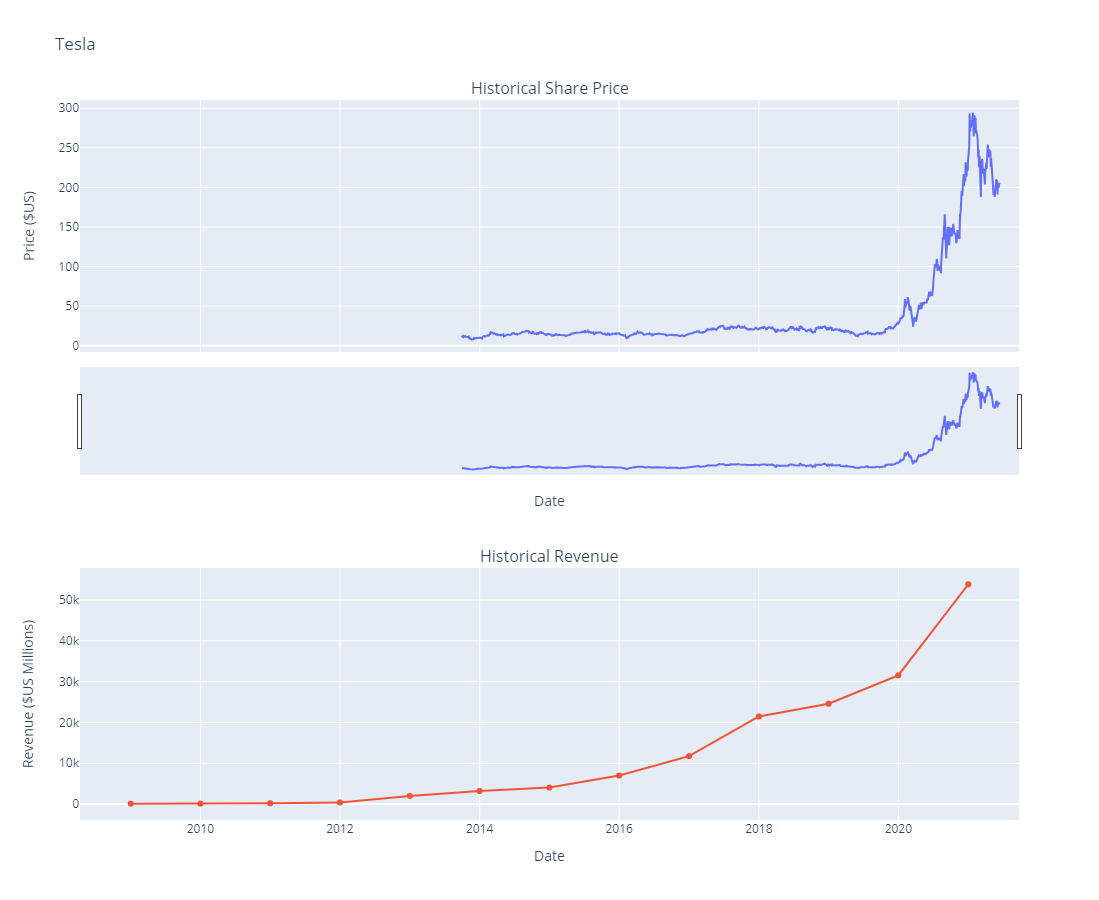

In [38]:
# Set to variable fig (this is the variable that has a return statement in the make_graph function
fig = make_graph(tesla_data, tesla_revenue, 'Tesla')

# Save the graph to html so that users can interact with it in a browser via github file
fig.write_html("D:/IBM_Data_Analyst_Cert/python_project_data_science/tesla_revenue_graph.html")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


C:\Users\ivism\AppData\Local\Temp\ipykernel_8408\584132661.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\ivism\anaconda3\envs\dive_ds\Lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ivism\AppData\Local\Temp\ipykernel_8408\584132661.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\U

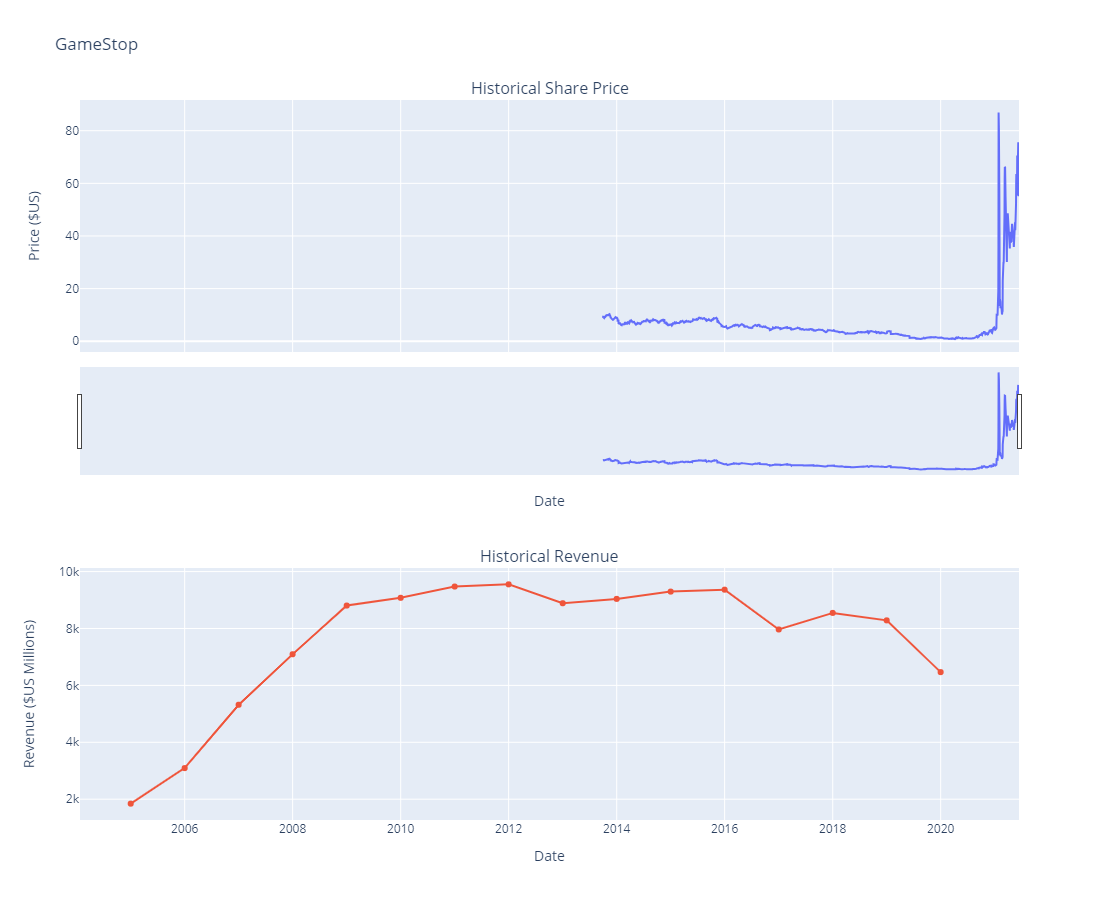

In [39]:
# Set to variable fig (this is the variable that has a return statement in the make_graph function
fig = make_graph(gme_data, gme_revenue, 'GameStop')

# Save the graph to html so that users can interact with it in a browser via github file
fig.write_html("D:/IBM_Data_Analyst_Cert/python_project_data_science/gme_revenue_graph.html")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
